In [8]:
import pandas as pd

In [9]:
df = pd.read_json('yourss.json')

df.head(3)

,timestamp,attachments,data,title,tags
0,2011-12-14 08:59:06,[{'data': [{'external_context': {'url': 'http:...,"[{'post': 'ha'}, {'update_timestamp': 13238531...",Eberenna Joel Chinagorom shared a link.,NaN
1,2012-05-04 07:08:48,[{'data': [{'external_context': {'url': 'http:...,"[{'post': 'wow'}, {'update_timestamp': 1336115...",Eberenna Joel Chinagorom shared a link.,NaN
2,2012-10-07 14:59:34,[{'data': [{'external_context': {'url': 'http:...,"[{'post': 'Cepha has just joined ImageChef'}, ...",Eberenna Joel Chinagorom shared a link.,NaN


In [ ]:
#    This looks a little confusing, however, our main task is to see the frequency with which I post
#    So let us do a little cleaning

In [10]:
#     First let us rename the timestamp column to date, so we can understand
df.rename(columns={'timestamp': 'date'}, inplace=True)

#     And then we can also drop some unnecessary columns, we just want to be left with date and data
df = df.drop(['attachments', 'title', 'tags'], axis=1)

#    However, before we proceed, shall we make sure it's datetime format
pd.to_datetime(df['date'])

df.head(3)

,date,data
0,2011-12-14 08:59:06,"[{'post': 'ha'}, {'update_timestamp': 13238531..."
1,2012-05-04 07:08:48,"[{'post': 'wow'}, {'update_timestamp': 1336115..."
2,2012-10-07 14:59:34,"[{'post': 'Cepha has just joined ImageChef'}, ..."


In [11]:
#  Let us see the shape of our dataset
#  So we can know the size  and equally check for NAN values
df.shape

(2601, 2)

In [12]:
#    Seems like i have posted a lot, from what we have here, my facebook posts begins in 2011, I actually thought it was 2012

#    let me check for null values (Oh we do not have any)
df.isna().sum()

date    0
data    0
dtype: int64

In [16]:
#    Given that we're spanning years of history here, looking at it month-to-month makes the most sense. 
#    What this means is that I need to group our 'date' column by months, and count how many rows (i.e., posts) are associated with each month.

df.set_index('date', inplace=True)
df

,data
date,
2011-12-14 08:59:06,"[{'post': 'ha'}, {'update_timestamp': 13238531..."
2012-05-04 07:08:48,"[{'post': 'wow'}, {'update_timestamp': 1336115..."
2012-10-07 14:59:34,"[{'post': 'Cepha has just joined ImageChef'}, ..."
2012-10-22 10:15:56,"[{'post': 'I am fabulous'}, {'update_timestamp..."
2012-10-25 10:53:59,"[{'post': 'Who's smarter'}, {'update_timestamp..."
...,...
2013-12-16 14:38:13,[]
2013-12-16 14:38:06,[]
2013-12-16 14:38:00,[]


In [22]:
# Then we have to Resample the data by month, counting how many posts occur in each month.
# Note that months with no posts have been correctly counted as 0 rather than simply skipped. 
# That's one of the reasons why using resample(), which is designed to work with time series, 
# is better for this kind of task than using something like groupby(), 
# where it's easy to skip months with no data if we're not careful.


post_counts = df.resample('MS').size()
post_counts.head(50)


date
2011-12-01     10
2012-01-01      2
2012-02-01      4
2012-03-01     10
2012-04-01      9
2012-05-01     29
2012-06-01      9
2012-07-01     14
2012-08-01      3
2012-09-01      9
2012-10-01     17
2012-11-01     12
2012-12-01      9
2013-01-01      7
2013-02-01      4
2013-03-01      0
2013-04-01      1
2013-05-01      1
2013-06-01      1
2013-07-01      8
2013-08-01     13
2013-09-01     18
2013-10-01      7
2013-11-01      0
2013-12-01     64
2014-01-01      0
2014-02-01      0
2014-03-01      1
2014-04-01     41
2014-05-01     97
2014-06-01     18
2014-07-01     23
2014-08-01     74
2014-09-01      5
2014-10-01     20
2014-11-01      1
2014-12-01    151
2015-01-01     14
2015-02-01      3
2015-03-01      0
2015-04-01     13
2015-05-01      0
2015-06-01     11
2015-07-01      0
2015-08-01      0
2015-09-01      0
2015-10-01     22
2015-11-01      6
2015-12-01      0
2016-01-01      0
Freq: MS, dtype: int64

In [35]:
# The highest number of posts I made per month

post_counts.max()

151

In [45]:
post_counts.shape

(149,)

In [57]:
new_df = post_counts.to_frame(name="number of post")
new_df.sort_values('number of post', ascending=False)

,number of post
date,
2014-12-01,151
2014-05-01,97
2016-09-01,95
2016-07-01,79
2014-08-01,74
...,...
2016-01-01,0
2017-02-01,0
2013-03-01,0


In [105]:
post_counts.size

149

In [76]:
new_df.mean()

number of post    17.456376
dtype: float64

In [83]:
import numpy as np

conditions = [
(new_df['number of post']>=30),
(new_df['number of post']<30)
]

choices = ['frequent', 'non frequent']

new_df['frequency']=np.select(conditions, choices, default=None)


In [86]:
new_df.value_counts('frequency')

frequency
non frequent    126
frequent         23
Name: count, dtype: int64

<Axes: xlabel='date'>

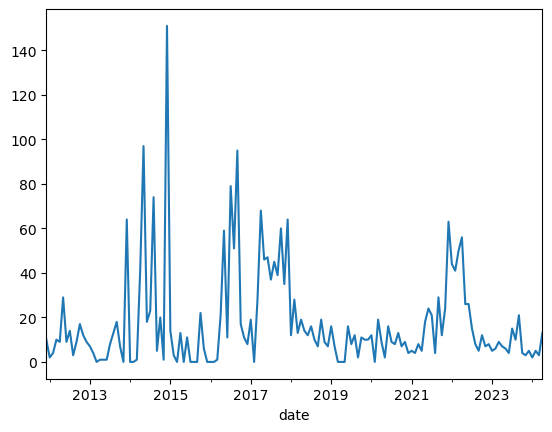

In [29]:
# Anyway, now that we're past the tricky part, all that's left is the fun: visualization! 
# To do that, we'll import matplotlib 

import seaborn as sns
import matplotlib.pyplot as plt
post_counts.plot(x='date')

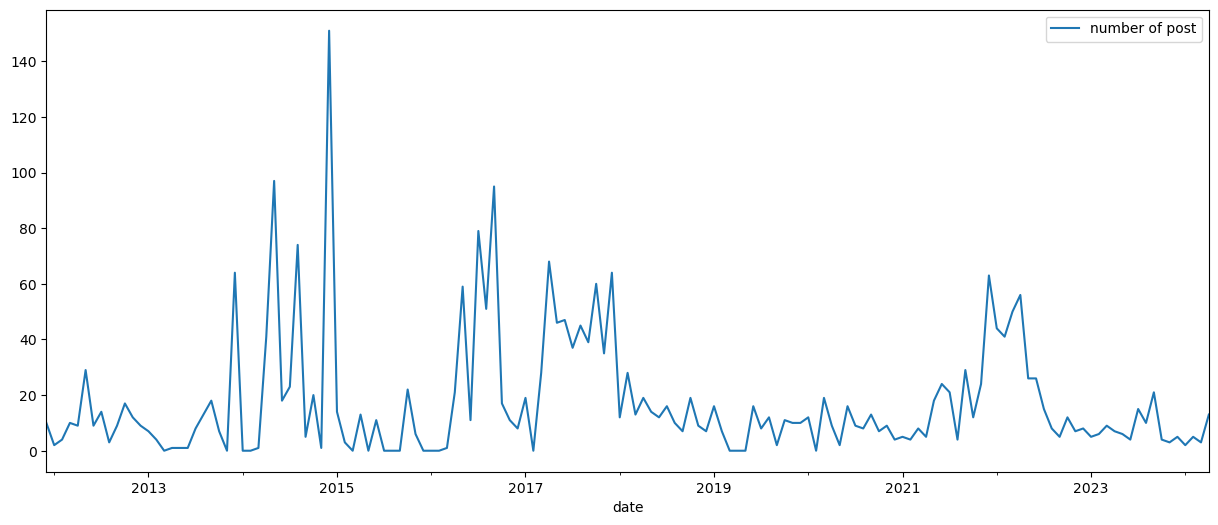

In [74]:
new_df.plot(figsize=(15, 6));

In [87]:
what_happened = new_df.loc['2018-01-01' : '2022-01-01']
what_happened

,number of post,frequency
date,,
2018-01-01,12,non frequent
2018-02-01,28,non frequent
2018-03-01,13,non frequent
2018-04-01,19,non frequent
2018-05-01,14,non frequent
2018-06-01,12,non frequent
2018-07-01,16,non frequent
2018-08-01,10,non frequent
2018-09-01,7,non frequent


In [97]:
activity19 = new_df.loc['2019']
activity19

,number of post,frequency
date,,
2019-01-01,16,non frequent
2019-02-01,7,non frequent
2019-03-01,0,non frequent
2019-04-01,0,non frequent
2019-05-01,0,non frequent
2019-06-01,16,non frequent
2019-07-01,8,non frequent
2019-08-01,12,non frequent
2019-09-01,2,non frequent


In [98]:
activity19['number of post'].sum()

92

In [99]:
activity20 = new_df.loc['2020']
activity20['number of post'].sum()

108

In [100]:
activity18 = new_df.loc['2018']
activity18['number of post'].sum()

166

In [101]:
activity21 = new_df.loc['2021']
activity21['number of post'].sum()

217

In [106]:
activity24 = new_df.loc['2024']
activity24['number of post'].sum()

23

In [107]:
activity24

,number of post,frequency
date,,
2024-01-01,2,non frequent
2024-02-01,5,non frequent
2024-03-01,3,non frequent
2024-04-01,13,non frequent
